<a href="https://colab.research.google.com/github/xkaycc/SALES-PREDICTION/blob/main/Project_2_Part_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project 2**

### **Task**
-  clean and explore the approved data set

**First dataset (Crude oil)**

1. Deleted unnecessary columns.
2. Deleted duplicate rows.
3. Identified and addressed missing values.
4. Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
5. Produced univariate visuals for the target and all features.
6. Identified outliers.
7. Clearly commented all of your cleaning steps and described any decisions you made.

In [ ]:
#Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
df =  pd.read_csv(r"C:\Users\USER\Desktop\Crude oil.csv")

In [ ]:
#view the first rows of the dataset
df.head()

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,ID_000000,2019-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,5010.0,6541.0
1,ID_000001,2019-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,4810.0,6492.0
2,ID_000002,2019-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,4733.0,6448.0
3,ID_000003,2019-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,4227.0,5932.0
4,ID_000004,2019-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,3841.0,5604.0


In [ ]:
#View the number of rows and columns in the dataset.
print(f"There are {df.shape[0]} rows, and {df.shape[1]} columns")

There are 27500 rows, and 30 columns


## Duplicated Rows

In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


## Columns display

In [ ]:
## Display column names
df.columns

Index(['ID', 'time', 'generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
import datetime
df ["time"] = pd.to_datetime(df["time"], errors='coerce')
df ["Year"] = df["time"].dt.year
df ["Month"] = df["time"].dt.month
df ["Day"] = df["time"].dt.day
df ["Hour"] = df["time"].dt.hour
df ["Minutes"] = df["time"].dt.minute
df ["Seconds"] = df["time"].dt.second

Datetime was imported to split the timeset in the data so that the algorithm can work with well and predict accurately

In [ ]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,total load forecast,total load actual,price day ahead,price actual,Year,Month,Day,Hour,Minutes,Seconds
count,27482.00000,27483.000000,27483.0,27483.000000,27483.000000,27482.000000,27483.0,27483.0,27483.0,0.0,...,27500.000000,27466.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.0,27500.0
mean,396.78022,476.247098,0.0,5555.281119,4411.479242,303.007059,0.0,0.0,0.0,NaN,...,28639.632291,28621.754715,4764.150436,5610.960327,2020.086982,6.298945,15.644436,11.498545,0.0,0.0
std,88.97453,363.187665,0.0,2252.850015,2015.548483,53.850784,0.0,0.0,0.0,NaN,...,4600.880403,4577.680533,1432.890512,1424.710564,0.896392,3.534103,8.792006,6.921752,0.0,0.0
min,0.00000,0.000000,0.0,1518.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,18105.000000,18041.000000,206.000000,933.000000,2019.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,340.00000,0.000000,0.0,4069.000000,2618.000000,267.000000,0.0,0.0,0.0,NaN,...,24712.750000,24724.000000,3994.000000,4783.000000,2019.000000,3.000000,8.000000,5.000000,0.0,0.0
50%,376.00000,558.000000,0.0,4871.000000,4698.000000,303.000000,0.0,0.0,0.0,NaN,...,28848.500000,28839.500000,4835.000000,5610.500000,2020.000000,6.000000,16.000000,11.000000,0.0,0.0
75%,475.00000,856.000000,0.0,6269.000000,6062.500000,336.000000,0.0,0.0,0.0,NaN,...,32151.000000,32082.750000,5700.000000,6530.250000,2021.000000,9.000000,23.000000,17.000000,0.0,0.0
max,592.00000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,41390.000000,41015.000000,10199.000000,11680.000000,2022.000000,12.000000,31.000000,23.000000,0.0,0.0


## Missing Values

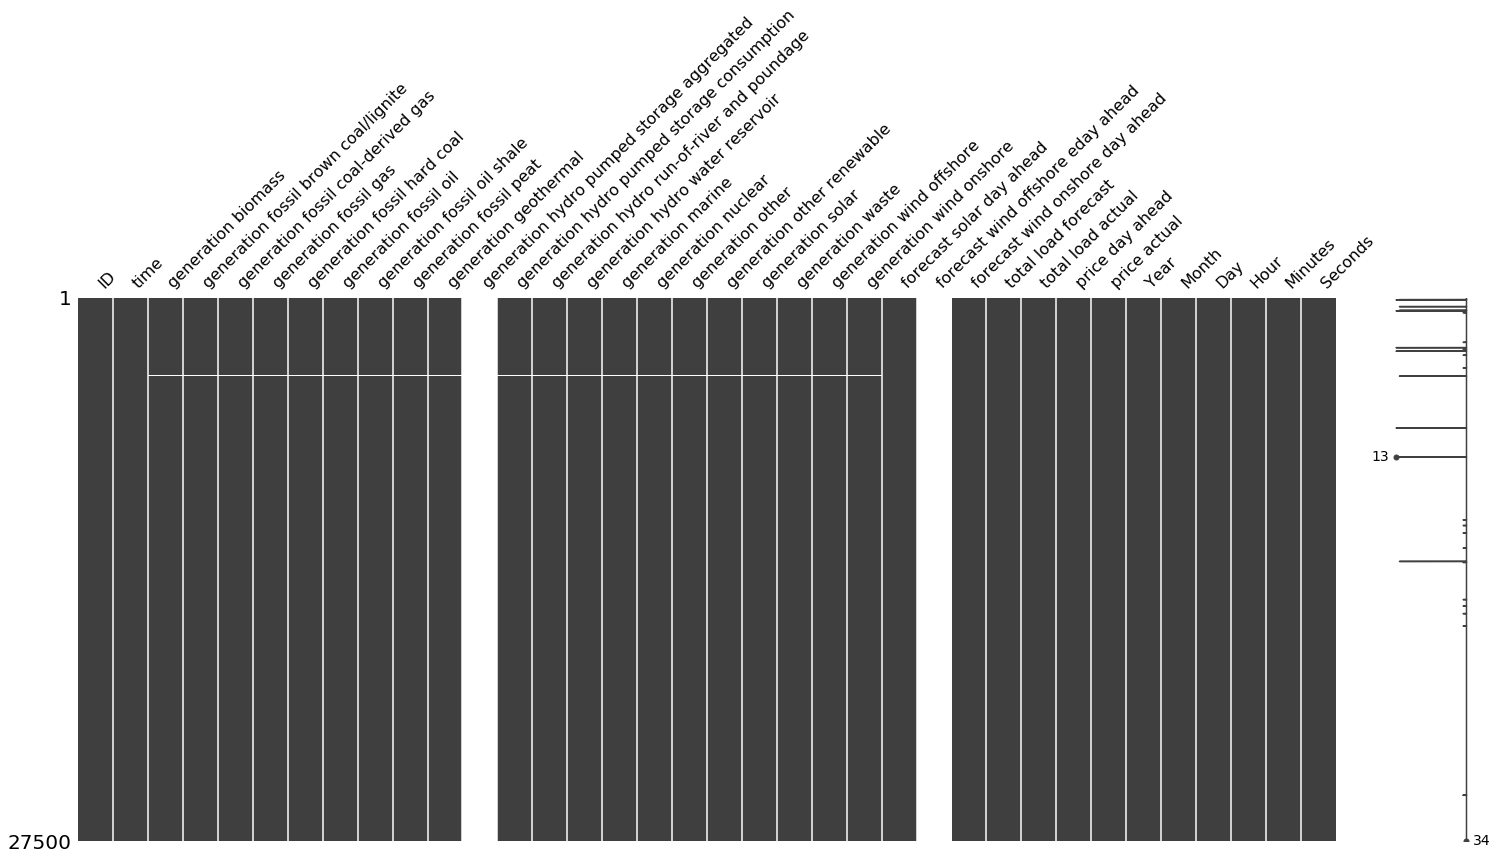

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
print(f" There are {df.isna().sum()} missing values in the dataset")

 There are ID                                                 0
time                                               0
generation biomass                                18
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     27500
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable         

In [ ]:
print(f" There are {df.isna().sum()/len(df)*100} missing values in the dataset")

 There are ID                                               0.000000
time                                             0.000000
generation biomass                               0.065455
generation fossil brown coal/lignite             0.061818
generation fossil coal-derived gas               0.061818
generation fossil gas                            0.061818
generation fossil hard coal                      0.061818
generation fossil oil                            0.065455
generation fossil oil shale                      0.061818
generation fossil peat                           0.061818
generation geothermal                            0.061818
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.065455
generation hydro run-of-river and poundage       0.065455
generation hydro water reservoir                 0.061818
generation marine                                0.065455
generation nuclear                               0.058182
gen

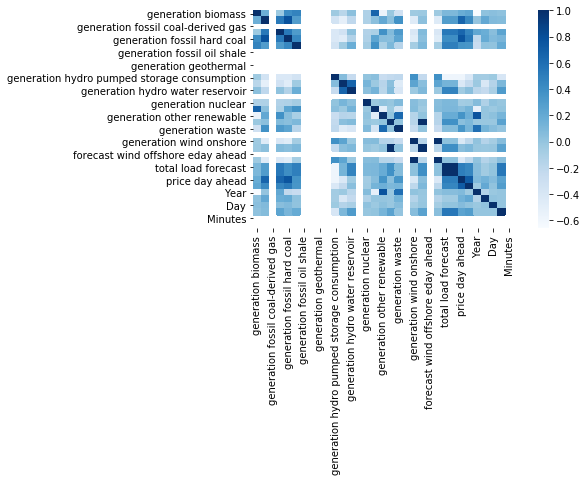

In [ ]:
sns.heatmap(df.corr(), annot = False, cmap = "Blues")

### **Delete unneccessary columns**

Variable columns with missing data more than 70% will be dropped. Also variable that has 0.1- 0.3 correction with the target variable will be dropped

In [ ]:
df.drop(["ID", "generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"], axis = 1, inplace = True)

In [ ]:
df.drop(["generation geothermal", "generation fossil peat", "generation fossil oil shale", "generation wind offshore"], axis = 1, inplace = True)

In [ ]:
df.drop(["generation marine", "generation fossil brown coal/lignite", "generation fossil coal-derived gas"], axis = 1, inplace = True)

## Outliers

from the descriptive analysis of the data, I found out that there are outliers in the variable columns. Exploratory analysis of columns will be done

In [ ]:
def remove_outliers(df, columns, threshold=3):
    # Create a copy of the DataFrame to work with
    df_cleaned = df.copy()

    # Loop through the specified columns
    for col in columns:

        # Calculate the z-score for each value in the column
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

        # Identify the outliers using the specified threshold
        outliers = z_scores > threshold

        # Replace the outliers with NaN
        df_cleaned[col][outliers] = np.nan

    # Drop any rows with NaN values
    df_cleaned = df_cleaned.dropna()

    return df_cleaned

In [ ]:
cleaned_df = remove_outliers(df, ['generation biomass','generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead'], threshold=2.5)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Remove outliers from multiple columns in a Pandas DataFrame using the z-score method.
  Parameters:
    - df: a Pandas DataFrame
    - columns: a list of column names to remove outliers from
    - threshold: the z-score threshold to use for outlier removal. Default is 3.
 Returns:


In [ ]:
X = df.drop(["price actual"], axis = 1)
y = df["price actual"].apply(int)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state = 42)

In [ ]:
X_train.isna().sum()

time                                            0
generation biomass                             13
generation fossil gas                          13
generation fossil hard coal                    13
generation fossil oil                          14
generation hydro pumped storage consumption    14
generation hydro run-of-river and poundage     14
generation hydro water reservoir               13
generation nuclear                             12
generation other                               13
generation other renewable                     13
generation solar                               13
generation waste                               14
generation wind onshore                        13
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              29
price day ahead                                 0
Year                                            0


## **Prepare the Data**

In [ ]:
## Instantiate the column selectors, SimpleImputer and OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Instantiate categorical and numerical selector
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include = "number")

In [ ]:
#Dealing with categorical 'and numerical missing values
freq_impute = SimpleImputer(strategy = "most_frequent")
mean_impute = SimpleImputer(strategy = "median")
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [ ]:
#make pipelines
#numerical pipelines
from sklearn.pipeline import make_pipeline
num_pipe = make_pipeline(mean_impute, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
#categorical pipeline
cat_pipe = make_pipeline(freq_impute, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
#Instantiate column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000013520BD7388>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector obje

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000013520BD7388>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector obje

In [ ]:
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_trans).sum(), "missing value in training data")
print(np.isnan(X_test_trans).sum(), "missing value in testing data")

0 missing value in training data
0 missing value in testing data


In [ ]:
print (X_train_trans, "Transformed train dataset", '\n')
print (X_test_trans, "Transformed test dataset")


[[-1.5491975   1.26229832  1.10162104 ...  0.21328889  0.
   0.        ]
 [-1.42544548  0.36749858  0.59606753 ...  0.06888621  0.
   0.        ]
 [-0.90793702  0.49323986  0.87019871 ...  0.35769157  0.
   0.        ]
 ...
 [ 0.10457953 -0.45026249 -0.84262451 ...  1.22410766  0.
   0.        ]
 [-1.05418941 -0.00308399  0.64821205 ... -1.08633525  0.
   0.        ]
 [-0.0866736   0.80847856  0.54441963 ...  0.50209425  0.
   0.        ]] Transformed train dataset 

[[-1.49294658 -0.60389708 -0.16424918 ... -1.08633525  0.
   0.        ]
 [-0.36792819 -0.62027887 -0.34452022 ... -0.94193256  0.
   0.        ]
 [ 0.9595935  -0.12218401 -0.57544594 ...  1.51291302  0.
   0.        ]
 ...
 [-0.61543224  0.1496651   0.81308805 ...  1.22410766  0.
   0.        ]
 [-0.12042415  1.00904476  0.55087562 ...  1.51291302  0.
   0.        ]
 [-0.4354293  -0.44406398  0.65466804 ... -1.37514061  0.
   0.        ]] Transformed test dataset
